Look at how echo annotations vary with variables of interest. 

In [1]:
import numpy as np
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# create a database connection
sqluser = 'mimic'
dbname = 'mimic'
schema_name = 'mimiciii'

cur = None

In [59]:
if cur: 
    cur.close()
    con.close()

con = psycopg2.connect(dbname = dbname, user = sqluser)
cur = con.cursor()
cur.execute('SET search_path to ' + schema_name)

In [60]:
query = \
"""
SELECT * FROM echo_features; 
"""
ef = pd.read_sql_query(query, con)
ef.head()

,row_id,icustay_id,hadm_id,subject_id,age_at_intime,gender,height,weight,bmi,ethnicity,...,fluid_daily_balance_ml_1,fluid_chartdate_1,fluid_daily_input_ml_2,fluid_daily_output_ml_2,fluid_daily_balance_ml_2,fluid_chartdate_2,fluid_daily_input_ml_3,fluid_daily_output_ml_3,fluid_daily_balance_ml_3,fluid_chartdate_3
0,83481,200003,163557,27513,17625 days 19:50:04,M,70.0,160.0,22.955102,WHITE,...,-975.0,2199-08-03,NaN,NaN,NaN,None,NaN,NaN,NaN,None
1,99984,200009,129607,29904,17353 days 10:34:32,F,64.0,190.0,32.609863,WHITE,...,4002.0,2189-12-01,NaN,NaN,NaN,None,NaN,NaN,NaN,None
2,99985,200009,129607,29904,17353 days 10:34:32,F,63.0,180.0,31.882086,WHITE,...,4002.0,2189-12-01,NaN,NaN,NaN,None,NaN,NaN,NaN,None
3,71333,200014,127229,9514,30921 days 23:16:48,M,NaN,NaN,NaN,UNKNOWN/NOT SPECIFIED,...,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None
4,77556,200019,112486,21789,30249 days 09:03:12,F,NaN,NaN,NaN,WHITE,...,456.0,2178-07-08,1970.0,985.0,985.0,2178-07-09,620.0,299.0,321.0,2178-07-10


In [65]:
ef[['icustay_id', 'ed_chartdate', 'fluid_chartdate_1', 'fluid_daily_input_ml_1', 
    'fluid_chartdate_2', 'fluid_daily_input_ml_2', 
    'fluid_chartdate_3', 'fluid_daily_input_ml_3', outtime']].head()

,icustay_id,ed_chartdate,fluid_chartdate_1,fluid_chartdate_2,fluid_chartdate_3,outtime
0,200003,2199-08-03,2199-08-03,None,None,2199-08-08 17:09:18
1,200009,2189-12-01,2189-12-01,None,None,2189-12-02 14:17:37
2,200009,2189-12-01,2189-12-01,None,None,2189-12-02 14:17:37
3,200014,2105-02-18,None,None,None,2105-02-18 16:53:29
4,200019,2178-07-08,2178-07-08,2178-07-09,2178-07-10,2178-07-11 10:28:40


## Demographics

### Age

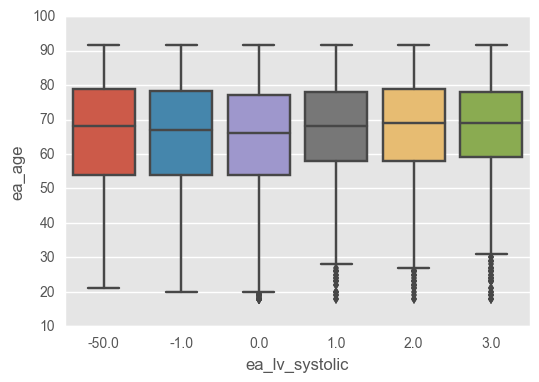

In [31]:
g = sns.boxplot('ea_lv_systolic', 'ea_age', data = ef)

### Sex

gender
F     7944
M    10349
Name: count, dtype: int64

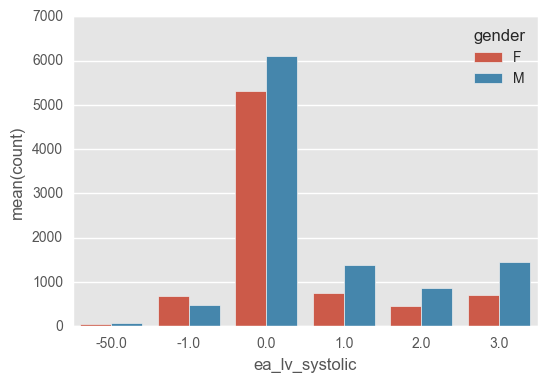

In [30]:
to_plot = ef[['gender', 'ea_lv_systolic', 'subject_id']].dropna().groupby(['gender', 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = ['gender', 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = 'gender')
to_plot.groupby('gender')['count'].sum()

### Height

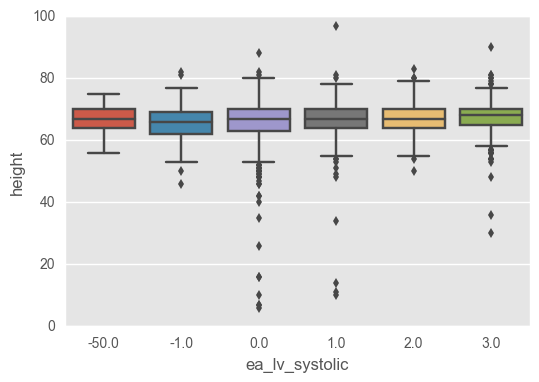

In [32]:
g = sns.boxplot('ea_lv_systolic', 'height', data = ef)

### Weight

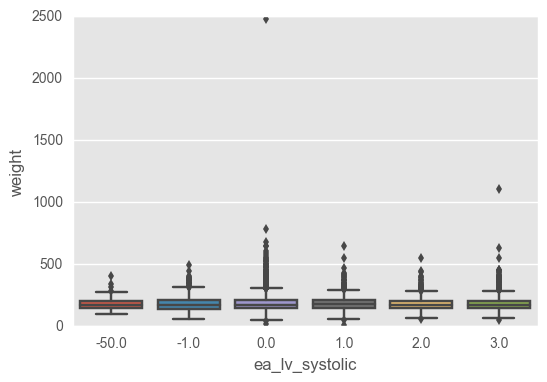

In [33]:
g = sns.boxplot('ea_lv_systolic', 'weight', data = ef)

### BMI

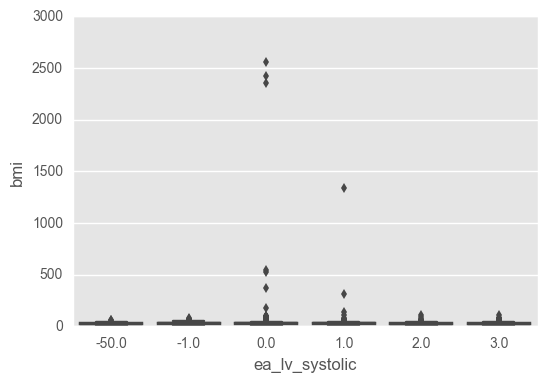

In [34]:
g = sns.boxplot('ea_lv_systolic', 'bmi', data = ef)

## Race

In [38]:
to_plot = ef[['ethnicity', 'ea_lv_systolic', 'subject_id']].dropna().groupby(['ethnicity', 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = ['ethnicity', 'ea_lv_systolic', 'count']

#sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = 'ethnicity')
to_plot.groupby('ethnicity')['count'].sum()

ethnicity
AMERICAN INDIAN/ALASKA NATIVE                     7
ASIAN                                           251
ASIAN - ASIAN INDIAN                             37
ASIAN - CAMBODIAN                                 7
ASIAN - CHINESE                                  85
ASIAN - FILIPINO                                  6
ASIAN - JAPANESE                                  2
ASIAN - KOREAN                                    5
ASIAN - OTHER                                     8
ASIAN - THAI                                      1
ASIAN - VIETNAMESE                               13
BLACK/AFRICAN                                     9
BLACK/AFRICAN AMERICAN                         1439
BLACK/CAPE VERDEAN                               52
BLACK/HAITIAN                                    21
CARIBBEAN ISLAND                                  1
HISPANIC OR LATINO                              466
HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)        1
HISPANIC/LATINO - COLOMBIAN                       4
HI

# Filters